# Visit the Wikipedia hyperlinks graph!

***

## Team members:

* **Giulia Scialanga**
* **Paolo Gentile**
* **Sagar Abhyankar**

***

### RQ1: 
Build the graph G=(V, E), where V is the set of articles and E the hyperlinks among them, and provide its basic information:

1) If it is direct or not

2) The number of nodes

3) The number of edges

4) The average node degree. Is the graph dense?

***

1) A **graph** is a mathematical structure consisting of a set of vertices and a set of edges connecting the vertices.

    Formally: G = (V, E), where V  is  a  set  and E ⊆ V × V .
    
    G = (V, E) undirected if for all v, w ∈ V :

    (v, w) ∈ E ⇐⇒ (w, v) ∈ E.

    Otherwise directed.

At first we open the file _wiki-topcats-reduced.txt_ and we see immediately that there are some nodes (not all nodes) like this:



| source | target |
|-------|-------|
| 104   | 107   |
| ...   | ...   |
| 107   | 104   |
                                                       
so we can conlude that our graph is **directed**. 

In [16]:
import researchQuest1 as rq1
import researchQuest2 as rq2
from importlib import reload

2) Calling the function `get_nodes()` in the module `_researchQuest1.py_` that counts the total number of nodes. 
   The final number has been computed by taking the lenght of the set of all the nodes taken by the reduced graph file.

In [2]:
nd = rq1.get_nodes()

The total number of nodes is 461193


3) The function `get_edges()` in the module `researchQuest1.py` counts the number of edges by counting the lenght of the array composed by each couple of nodes (that rapresent an edge of the reduced graph).

In [3]:
ed = rq1.get_edges()

The total number of edges is 2645247


4) **Average node degree** - from the **Handshaking Lemma** we have been able to extrapolate the formula to compute the average degree af a directed graph in the following way. 

\begin{equation*}
Avg_{node degree} = \frac{edges*2}{nodes} 
\end{equation*}

In [4]:
rq1.avg_deg(ed, nd)

The average degree of the graph in 11


4) **Is the graph dense?** - to see if the graph is dense, we calculate its density. 

For **directed simple graphs**, the graph density is defined as: 
\begin{equation*}
Density = \frac{edges}{nodes*(nodes-1)}
\end{equation*}

where \begin{equation*}nodes*(nodes-1)\end{equation*} is the maximum number of nodes. 

In [5]:
rq1.check_density(ed, nd)

The maximum number of edge is 212698522056, the density value is 1.2436602635647606e-05


We can conclude that since a dense graph is defined as a graph which the values of the maximal number of edges and the value of the dinsity are very close, we can say that our graph is **definetly not dense**.

# RQ2

***

Given a category $$C_0 = \{article_1, article_2, \dots \}$$ as input we want to rank all of the nodes in V according to the following criteria:

Obtain a block-ranking, where the blocks are represented by the categories. In particular, we want:

$$block_{RANKING} =\begin{bmatrix} C_0 \\ C_1 \\ \dots \\ C_c\\ \end{bmatrix}$$

Each category  corresponds to a list of nodes.

The first category of the rank, C0, always corresponds to the input category. The order of the remaining categories is given by:

\begin{equation*}
distance(C_0, C_i) = median(ShortestPath(C_0, C_i))
\end{equation*}

The lower is the distance from C_0, the higher is the C_i position in the rank. ShortestPath(C_0, C_i) is the set of all the possible shortest paths between the nodes of C_0 and C_i. Moreover, the length of a path is given by the sum of the weights of the edges it is composed by.

Once you obtain the block_{RANKING} vector, you want to sort the nodes in each category. The way you should sort them is explained by this example:

Suppose the categories order, given from the previous point, is C_0, C_1, C_2

**[STEP1]** Compute subgraph induced by C_0. For each node compute the sum of the weigths of the in-edges.

\begin{equation*}
score_{article_i} = \sum_{j \in in-edges(article_i)} w_j
\end{equation*}

**[STEP2]** Extend the graph to the nodes that belong to C_1. Thus, for each article in C_1 compute the score as before. Note that the in-edges coming from the previous category, C_0, have as weights the score of the node that sends the edge.

**[STEP3]** Repeat Step2 up to the last category of the ranking. In the last step of the example you clearly see the weight update of the edge coming from node E.

***

## Block Ranking

For this part of the research question, first of all we wanted to obtain only the categories of article which can give sufficient information in order to run a valuable analysis. This means that we want to consider only the categories that contain a number of article that we can consider big enough.

In [17]:
categories = rq2.get_only_big_categories()

In [7]:
rq2.print_cardinality(categories)

Living_people :  348300
Year_of_birth_missing_(living_people) :  28498
English-language_films :  22463
American_films :  15159
American_film_actors :  13865
Main_Belt_asteroids :  11660
American_television_actors :  11531
Black-and-white_films :  10759
The_Football_League_players :  7814
Rivers_of_Romania :  7729
Debut_albums :  7561
English_footballers :  7538
Members_of_the_United_Kingdom_Parliament_for_English_constituencies :  6491
Association_football_midfielders :  5827
Indian_films :  5568
Harvard_University_alumni :  5549
Place_of_birth_missing_(living_people) :  5532
Major_League_Baseball_pitchers :  5192
Association_football_forwards :  5097
Asteroids_named_for_people :  4895
English-language_albums :  4760
People_from_New_York_City :  4614
Association_football_defenders :  4588
British_films :  4422
Year_of_birth_missing :  4346
Year_of_death_missing :  4122
Windows_games :  4025
Association_football_goalkeepers :  3737
American_military_personnel_of_World_War_II :  3720
Art

Another important decision was made about the **data structure** that will store the graph, since we havn't used any library.
What is needed is a data structure with fast access because we expect to compute thousands and thousands of shortest paths, which means hundred of thousands of controls. After taking in consideration the idea to store the main graph in a dictionary, we thought that it would have been much easier to store the graph in a **list** of list. Each index will rapresent a node and in each index it is stored an inner list of all the nodes that are connected to the index-node.

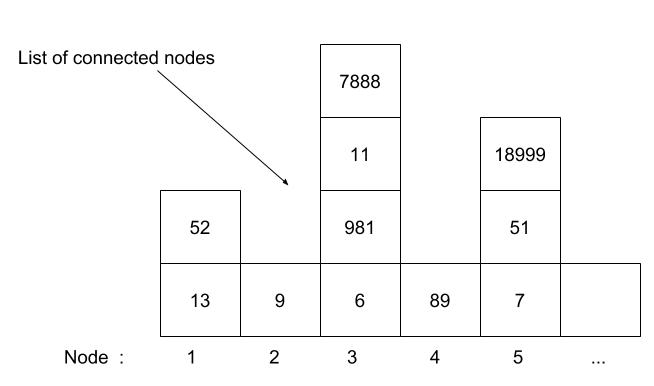

In [2]:
from IPython.display import Image
Image(filename='imgs/graph.png')

In [18]:
graph = rq2.load_graph()

After searching on the web and seeking for possible correlation between the categories, we wanted to choose our input category in order to obtain a block ranking that could offer an interest analysis. Since a lot of categories are related to the cinema environment, we have chose as our input category to use the wikipedia category of articles **"British films"**.
We expect to have at the top of our block rank all the categories that deal in someway with the entertainment industry.

Here we are creating a list of that will rapresent our C0.

In [10]:
British_films = []
for i in categories['British_films']:
    British_films.append(i)

As algorithm for computing the shortest path we have chosen to use the **Dijkstra's shortest path Algorithm**. Given a graph and a source vertex in the graph, find shortest paths from source to all vertices in the given graph.
At each iteration, we generate a SPT (shortest path tree) with given source (node of our C0) as root. We maintain two sets, one set contains vertices included in shortest path tree, other set includes vertices not yet included in shortest path tree. At every step of the algorithm, we find a vertex which is in the other set (set of not yet included) and has a minimum distance from the source. Time Complexity of the implementation is **O(V^2)**. 
The nice visualization below gives an overall idea on how Dijkstra's Algorithm work for just one path.

In [1]:
from IPython.display import HTML
HTML('<img src="imgs/Dijkstras_progress_animation.gif">')

In [11]:
rank = rq2.get_medians_shortest_paths(graph, British_films, categories)

100%|██████████| 4422/4422 [55:34<00:00,  1.51it/s]


In [24]:
ranklist = rq2.rank_it(rank)

Below is displayed the **block ranking** based on the median of the shortest path from our input category to all the others. As we expected the top categories are related to the movie industry.

Of course, the category chosen as input occupies the first place of the chart. The second place is occupied by a category (English language films) that has the same median value of the input category. This is an obvious result if we consider that all the british movie are shot in english language. We have expected also that the category "Living people" could reach one of the top places due to its great magnitude of article (almost 400k articles).

The following categories are more and more less coherent with the input category, the more "downwards" you read.

In [25]:
ranklist

[('British_films', 0.0),
 ('English-language_films', 0.0),
 ('Living_people', 1.0),
 ('English_television_actors', 1.0),
 ('Harvard_University_alumni', 2.0),
 ('Members_of_the_United_Kingdom_Parliament_for_English_constituencies', 2.0),
 ('Year_of_birth_missing_(living_people)', 2.0),
 ('American_films', 2.0),
 ('People_from_New_York_City', 2.0),
 ('American_Jews', 2.0),
 ('American_television_actors', 2.0),
 ('American_film_actors', 2.0),
 ('Black-and-white_films', 2.0),
 ('Article_Feedback_Pilot', 2.0),
 ('American_military_personnel_of_World_War_II', 2.0),
 ('English_footballers', 3.0),
 ('The_Football_League_players', 3.0),
 ('Association_football_forwards', 3.0),
 ('Association_football_midfielders', 3.0),
 ('Association_football_defenders', 3.0),
 ('Year_of_birth_unknown', 3.0),
 ('Indian_films', 3.0),
 ('Year_of_death_missing', 3.0),
 ('English_cricketers', 3.0),
 ('Main_Belt_asteroids', 3.0),
 ('Asteroids_named_for_people', 3.0),
 ('English-language_albums', 3.0),
 ('Fellows_of

Now the final step, sorting the nodes of each category. At this point we are actually telling which are the nodes for each induced sub-graph that have a big in-degree value. The indegree is computed only taking in consideration the edges coming from the category immediatly above in the block rank and from the category-subgraph itself. The value of the in-degree in our analysis is linked to the value of the path calculated in the block ranking. If two articles are related it means that in the graph the two nodes are connected by an edge (at best). So in this case, a high ranked article rapresents an article which is more related with the input category.

In [269]:
node_rank = rq2.compute_rank_nodes(ranklist, graph, categories)

100%|██████████| 34/34 [00:02<00:00, 23.74it/s]


In [13]:
d = get_dictionary_article_names()

In [270]:
node_rank

['British_films',
 (1041937, 1501),
 (1253712, 15),
 (1253703, 14),
 (1253707, 13),
 (1253709, 13),
 (1253706, 11),
 (1253711, 8),
 (1044136, 8),
 (1061229, 8),
 (1253690, 7),
 (1253698, 7),
 (1253702, 7),
 (1065379, 7),
 (1067959, 7),
 (1061301, 7),
 (1253695, 6),
 (1041754, 6),
 (1041755, 6),
 (1058416, 6),
 (1058907, 6),
 (1059626, 6),
 (1044115, 6),
 (1061299, 6),
 (1062283, 6),
 (1253687, 5),
 (1253697, 5),
 (1253699, 5),
 (1068343, 5),
 (1044015, 5),
 (1044090, 5),
 (1044099, 5),
 (1044647, 5),
 (1044789, 5),
 (1044791, 5),
 (1062535, 5),
 (1062688, 5),
 (1062720, 5),
 (1505790, 5),
 (1505791, 5),
 (1505792, 5),
 (1505793, 5),
 (1056678, 5),
 (1056680, 5),
 (1065564, 4),
 (1598163, 4),
 (1057910, 4),
 (1041752, 4),
 (1041753, 4),
 (1042469, 4),
 (1042507, 4),
 (1059183, 4),
 (1067382, 4),
 (1042841, 4),
 (1043074, 4),
 (1044100, 4),
 (1044107, 4),
 (1142509, 4),
 (1658632, 4),
 (1044495, 4),
 (1060909, 4),
 (1060953, 4),
 (1044641, 4),
 (1044648, 4),
 (1061298, 4),
 (1201266, 4),

In [299]:
get_top_three_of_each_category(d, node_rank)

British films: 
1st ranked article:  Cinema of the United Kingdom
2nd ranked article:  From Russia with Love (film)
3rd ranked article:  Thunderball (film)

English language films: 
1st ranked article:  From Russia with Love (film)
2nd ranked article:  Thunderball (film)
3rd ranked article:  Lawrence of Arabia (film)

Living people: 
1st ranked article:  Roger Ebert
2nd ranked article:  Peter Travers
3rd ranked article:  Janet Maslin

English television actors: 
1st ranked article:  Phil Collins
2nd ranked article:  Cliff Richard
3rd ranked article:  Laurence Olivier

Harvard University alumni: 
1st ranked article:  T. S. Eliot
2nd ranked article:  Jack Lemmon
3rd ranked article:  Alan Jay Lerner

Members of the United Kingdom Parliament for English constituencies: 
1st ranked article:  John Stuart Mill
2nd ranked article:  Winston Churchill
3rd ranked article:  Margaret Thatcher

Year of birth missing (living people): 
1st ranked article:  John Lyon (commissioner)
2nd ranked article: 